# Исследование пользователей разных тарифов 

***Цель исследования*** - выявить тариф, который лучше продается и приносит большую прибыль

***Описание проекта***

Входные данные - данные 500 пользователей: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год

Клиентам предлагается два тарифа: 

***Тариф «Смарт»***

- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля, сообщение: 3 рубля, 1 Гб интернет-трафика: 200 рублей

***Тариф «Ультра»***
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль, сообщение: 1 рубль, 1 Гб интернет-трафика: 150 рублей

Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше для корректировки рекламного бюджета. 

***Ход исследования***

Необходимо произвести обзор данных, их обработку. Затем проанализировать данные и выдвинуть гипотезы. После этого проверить их. 

## Обзор данных

Импортируем необходимые библиотеки для работы с проектом:

In [1]:
# импортируем библиотеку pandas
import pandas as pd

# импортируем библиотеку numpy
import numpy as np

# импортируем библиотеку matplotlib
import matplotlib.pyplot as plt

# импортируем библиотеку seaborn
import seaborn as sns

# импортируем библиотеку stats
from scipy import stats as st

# просим pandas отображать до 50 столбцов в таблице
pd.options.display.max_columns = 50

Для анализа данных нам предоставлено 5 таблиц с данными. Разберем их по очереди:

#### Таблица calls

Таблица с данными о звонках находится в папке /datasets/calls.csv. Прочитаем ее с помощью библиотеки pandas для работы с данными:

In [2]:
# создаем переменную calls и помещаем в нее таблицу
calls = pd.read_csv('/datasets/calls.csv')
# выводим на экран первые 10 срок таблицы
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [3]:
# выводим общие данные о таблице
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


В таблице 4 столбца с данными. Типы данных object, float и int. 

Согласно документации:
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

Также согласно документации:
«Мегалайн» всегда округляет секунды до минут. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

Это значит, что при дальнейшей обработке данных необходимо будет округлить значения до целочисленных причем в большую сторону при любом количестве секунд. 

Пропусков в данных нет, но есть нулевые значения в столбце с длительностью звонка. Согласно документации эти данные корректны, значит сам звонок был пропущен. 

#### Таблица internet

Таблица с данными о интернет-сессиях находится в папке /datasets/internet.csv. Прочитаем ее с помощью библиотеки pandas для работы с данными:

In [4]:
# создаем переменную internet и созраняем в нее таблицу с данными об интернет-сессиях
internet = pd.read_csv('/datasets/internet.csv')
# выведим первые 10 строк таблицы
internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [5]:
# выводим информацию о таблице
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


В таблице 5 столбцов. Типы данных object, int и float. 

Согласно документации:
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

В документации нет данных о информации в столбце Unnamed:0. Необходимо проверить какие данные он содержит, и насколько они нам будут полезны в дальнейшей работе. 
Пропусков в данных нет. 

Также согласно документации нам известно:
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

Это значит, что для проведения анализа данных данного столбца мы также можем привести значения к целочисленным и привести к гигабайтам. 

#### Таблица messages

Таблица с данными о сообщениях находится в папке /datasets/messages.csv. Прочитаем ее с помощью библиотеки pandas для работы с данными:

In [6]:
# создаем переменную messages и сохраняем в нее таблицу с данными
messages = pd.read_csv('/datasets/messages.csv')
# выводим первые 10 строк таблицы
messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [7]:
# выводим общую информацию о таблице
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


В таблице три столбца с данными о сообщениях. Типы данных с столбцах object и int.

Согласно документации к данным:
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

Пропущенных значений нет. Вероятно потребуется обработка типов данных в столбцах, так как дата имеет тип данных object 

#### Таблица tariffs

Таблица с данными о тарифах находится в папке /datasets/tariffs.csv. Прочитаем ее с помощью библиотеки pandas для работы с данными:

In [8]:
# создаем переменную tariffs и сохраняем в нее таблицу с данными
tariffs = pd.read_csv('/datasets/tariffs.csv')
# выводим таблицу
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [9]:
# выводим информацию о таблице
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


В таблице 8 столбцов и 2 строки. Указаны данные по тарифам. Типы данных int и object.

Согласно документации к данным:
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)


Пропущенных значений нет, заполнять не требуется. Данные в таблице соответствуют данных по документации к проекту. 

#### Таблица users

Таблица с данными о пользователях находится в папке /datasets/users.csv. Прочитаем ее с помощью библиотеки pandas для работы с данными:

In [10]:
# создаем переменную users и сохраняем в нее таблицу с данными
users = pd.read_csv('/datasets/users.csv')
# выводим первые 10 строк таблицы
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [11]:
# выводим информацию о таблице
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


В таблице 8 столбцов с данными. Типы object и int. 

Согласно документации к данным:
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

У нас есть пропуски в столбце churn_date. Из заполнять не требуется, так как, согласно документации, это обозначает, что у клиента тариф еще актуален на текущий момент. 

Необходимо вновь проверить типы данных в столбце с датой. 

### Вывод

Мы открыли 5 файлов с данными и проверили значения в них. На последующих этапах работы:
- необходимо перевести данные о длительности звонков к целочисленным значениям и округлить их в большую сторону до минут вне зависимости от общего количество секунд
- необходимо перевести данные об объеме потраченного за сессию трафика в гигабайты, при этом произвести округление до целочисленных значений в большую сторону
- обработать значения даты во всех таблицах, привести к типу датавремя, а не object, как есть сейчас
- проверить данные в лишнем столбце (Unnamed: 0) в таблице internet и удалить его если его данные не влияют на проведение дальнейшего анализа
- проверить данные на аномалии и явные\не явные дубликаты

## Предобработка данных

### Приведение данных к нужным типам

Исходя из того, что мы выделили при обзоре обработаем по очереди все таблицы с данными:

#### Таблица calls

В столбце с длительностью звонков приведем значения к целочисленным и округлим до минут строго в большую сторону:

In [12]:
# округляем в большую сторону значения столбца duration и приводим к целочисленным
calls['duration'] = np.ceil(calls['duration']).astype('int')

Необходимо изменить тип данных в столбце с датой звонка к формату datetime:

In [13]:
# приводим значения столбца call_date к формату datetime
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

Для дальнейшего анализа нам необходимо будет создать отдельный столбец выделив данные по месяцам. Согласно документации в таблице находятся данные только за 2018 год. Однако есть вероятность, что есть данные по другим года, попавшие в выгрузку случайно. Поэтому выделим год из столбца с датой звонка и проверим все уникальные значения данного столбца:

In [14]:
# выделяем год из данных столбца call_date, сохраняем данные в переменную year
year_call = pd.DatetimeIndex(calls['call_date']).year
# проверяем уникальные значения year
year_call.unique()

Int64Index([2018], dtype='int64', name='call_date')

Отлично. Значение года у нас одно - 2018. Значит можно вытащить данные по месяца, не прибегая к дополнительным манипуляциям:

In [15]:
# создаем столбец month в таблице calls, добавляем в него данные о месяце, в котором был совершен звонок
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
# проверяем какие данные мы получили
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


Проверим данные по длительности звонков:

In [16]:
# выводим описание данных по длительности звонков
calls['duration'].describe()

count    202607.000000
mean          7.158198
std           5.959173
min           0.000000
25%           2.000000
50%           6.000000
75%          11.000000
max          38.000000
Name: duration, dtype: float64

Согласно документации к данным, нулевые значения корректны. Они отражают пропущенные звонки, удалять их не требуется.
Остальные данные в целом являются корректными. Максимальное значение звонка - 38 минут - более чем приемлемое. 

Проверим количество явных дубликатов в данных:

In [17]:
# проверяем количество явных дубликатов
calls.duplicated().sum()

0

Дубликатов нет, проверяем данные:

In [18]:
# выводим общую информацию о таблице
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
 4   month      202607 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 7.7+ MB


Отлично. Все данные приведены к нужным типам. Можем переходить к обработке следующей таблицы:

#### Таблица internet

При выгрузке данной таблицы обратили внимание, что есть лишний столбец, не указанный в документации, с названием Unnamed: 0. 
Проверим какие уникальные данные содержит столбец:

In [19]:
# выводим уникальные значения столбца Unnamed: 0
internet['Unnamed: 0'].unique()

array([     0,      1,      2, ..., 149393, 149394, 149395])

Судя по всему этот столбец просто дублирует индексы строк. В целом для дальнейшего анализа он нам не потребуется. Удалим его:

In [20]:
# удаляем лишний столбец из таблицы
del internet['Unnamed: 0']
# выводим первые 5 строк таблицы для проверки данных
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


Столбец успешно удален. Новый столбец с данными по потраченным гигабайтам добавлен!

Далее необходимо перевести дату в удобный для анализа формат:

In [21]:
# переводим дату в столбце 	session_date в формат datetime
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

Тут нам также для дальнейшего анализа потребуется выделить данные по месяцам. Поэтому проверим все ли данные содержат только 2018 год, или требуется учитывать год тоже:

In [22]:
# выделяем данные по году, когда была сессия и добавляем в year_int
year_int = pd.DatetimeIndex(internet['session_date']).year
# выводим уникальные значения столбца year_int
year_int.unique()

Int64Index([2018], dtype='int64', name='session_date')

Супер. Данные представлены только за 2018 год, поэтому можно просто выделить месяц:

In [23]:
# создаем отдельный столбец и добавляем в него месяц из столбца session_date
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
# выводим первые 5 строк для проверки
internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


Данные успешно выделены. Проверим данные в целом по столбцу mb_used: 

In [24]:
# выводим описание данных столбца gb_used
internet['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

В этой таблице есть нулевые значения по потраченным мегабайтам. По документации у нас нет данных как по звонкам, что нулевые значения не стоит удалять. Проверим какую долю составляют такие значения, и можем ли мы их удалить:

In [25]:
# вычисляем долю нулевых значений в столбце потраченных гигабайтов, от общего количества данных
share_internet_mb0 = len(internet[internet['mb_used']<1])/len(internet['mb_used'])
# выводим данные в виде процента
print(f'{share_internet_mb0:.2%}')

13.19%


13% - это слишком много, чтобы принимать решение об удалении данных. 

Думаю, что такие данные могут быть связаны, например, с тем, что пользователь открыл браузер, но далее переходить никуда не стал. В этом случае система могла зафиксировать начало сессии. Однако по факту гигабайты потрачены не были. 
Оставим такие значения.

Проверим данные на наличие дубликатов:

In [26]:
# проверяем наличие явных дубликатов
internet.duplicated().sum()

0

Дубликатов нет. Выведем общую информацию по таблице после всех преобразований:

In [27]:
# выведем общую информацию о таблице, после всех преобразований
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
 4   month         149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


Данные приведены к корректному виду. Можем переходить к обработке следующих таблиц. 

#### Таблица messages

В таблице с сообщения необходимо произвести преобразование даты в нужный формат:

In [28]:
# приводим данные в столбце message_date к формату datetime
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

Как и в прошлый таблицах для дальнейших расчетов нам необходимо добавить столбец с месяцем. Если в таблице представлены данные за разные года, то необходимо учесть это. 
Проверим какие года есть в таблице:

In [29]:
# выделяем данные по году, когда было отправлено сообщение и добавляем в year_mes
year_mes = pd.DatetimeIndex(messages['message_date']).year
# выводим уникальные значения столбца year_int
year_mes.unique()

Int64Index([2018], dtype='int64', name='message_date')

Отлично. В этой таблице данные также указаны только за 2018 год, поэтому год можно не учитывать:

In [30]:
# создаем отдельный столбец и добавляем в него месяц из столбца message_date
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
# выводим первые 5 строк для проверки
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


Проверим таблицу на наличие явных дубликатов:

In [31]:
# проверяем наличие явных дубликатов
messages.duplicated().sum()

0

Дубликатов нет. Выведем еще раз общую информацию о таблице после обработки столбцов:

In [32]:
# выводим общую информацию о таблице
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
 3   month         123036 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ MB


Данные приведены в нужные форматы. Можем переходить к следующей таблице. 

#### Таблица tariffs

Для удобства дальнейшей обработки данных добавим столбец с данными по включенному в пакет услуг объему интернета в гагабайтах:

In [33]:
# добавляем столбец gb_per_month_included, добавляем в него данный столбца mb_per_month_included переведенные в гигабайты
# округляем их в большую сторону и приводим к целочисленным значениям
tariffs['gb_per_month_included'] = np.ceil(tariffs['mb_per_month_included']/1024).astype(int)
# выводим таблицу с тарифами
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
0,50,15360,500,550,200,3,3,smart,15
1,1000,30720,3000,1950,150,1,1,ultra,30


Для дальнейшего удобства объединения таблиц в одну переименуем столбец tariff_name в tariff^

In [34]:
# переименовываем столбец tariff_name в tariff
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})

С остальными данными дополнительных действий не требуется. 

#### Таблица users

Как и в прошлых таблицах переводим данные столбцов с датой регистрации в формат datetime:

In [35]:
# переводим данные столбца reg_date в формат datetime
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
# переводим данные столбца churn_date в формат datetime
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

Проверим столбцы city и age на наличие неявных дубликатов и аномальных значений:

In [36]:
# выводим уникальные столбцы столбца city, сортируем в алфавитном порядке
users['city'].sort_values().unique()

array(['Архангельск', 'Астрахань', 'Балашиха', 'Барнаул', 'Белгород',
       'Брянск', 'Владивосток', 'Владикавказ', 'Владимир', 'Волгоград',
       'Волжский', 'Вологда', 'Воронеж', 'Грозный', 'Екатеринбург',
       'Иваново', 'Ижевск', 'Иркутск', 'Казань', 'Калининград', 'Калуга',
       'Кемерово', 'Киров', 'Кострома', 'Краснодар', 'Красноярск',
       'Курган', 'Курск', 'Липецк', 'Магнитогорск', 'Махачкала', 'Москва',
       'Мурманск', 'Набережные Челны', 'Нижневартовск', 'Нижний Новгород',
       'Нижний Тагил', 'Новокузнецк', 'Новороссийск', 'Новосибирск',
       'Омск', 'Оренбург', 'Орёл', 'Пенза', 'Пермь', 'Петрозаводск',
       'Подольск', 'Ростов-на-Дону', 'Рязань', 'Самара',
       'Санкт-Петербург', 'Саранск', 'Саратов', 'Севастополь', 'Смоленск',
       'Сочи', 'Ставрополь', 'Стерлитамак', 'Сургут', 'Тамбов', 'Тверь',
       'Тольятти', 'Томск', 'Тула', 'Тюмень', 'Улан-Удэ', 'Ульяновск',
       'Уфа', 'Хабаровск', 'Химки', 'Чебоксары', 'Челябинск', 'Череповец',
       'Чи

In [37]:
# выводим уникальные значения столбца age, сортируем по возрастанию
users['age'].sort_values().unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75])

Повторов в данных или аномальных значений нет. Все в целом корректно. Проверим таблицу на наличие явных строк-дубликатов:

In [38]:
# проверяем наличие явных дубликатов
users.duplicated().sum()

0

Дубликатов нет, можем переходить к расчетам. 

### Предварительные расчеты и объединение таблиц

Перед переходом к анализу самих данных произвем ряд рассчетов. Сгруппируем пользователей по количеству и длительности звонков за месяц:

In [39]:
# группируем таблицу catts по id пользователя и месяцу, считаем количество id и суммируем данные по количеству потраченных мин
group_calls = calls.groupby(['user_id','month']).agg({'id': 'count', 'duration': 'sum'}).reset_index()
# переименовывает столбец id в calls_count
group_calls = group_calls.rename(columns={'id':'calls_count'})
# выводим первые 5 строк новой таблицы
group_calls.head()

,user_id,month,calls_count,duration
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466


Таким же образом поступаем с данными о сообщениях. Группируем их по количество отправленных смс каждым из пользователей в месяц:

In [40]:
# группируем данные в таблице messages по id пользователю и месяцу, считаем количество отправленнх смс
group_mess = messages.groupby(['user_id','month']).agg({'id': 'count'}).reset_index()
# переименуем столбец id в mess_count
group_mess = group_mess.rename(columns={'id':'mess_count'})
# выводим первые 5 строк новой таблицы
group_mess.head()

,user_id,month,mess_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


Производим манипуляции с таблицей с данными по интернет-сессиям. Считаем сколько тратит мегабайт каждый из пользователей в месяц:

In [41]:
# группируем данные в таблице internet по id подльзователя и месяцу, суммируем количество потраченных гигов в месяц
group_internet = internet.groupby(['user_id','month']).agg({'mb_used': 'sum'}).reset_index()

Данные в таблице по интернет-сессиям данные по потраченному трафику представлены в мегабайтах. Согласно документации, данные округляются до гигабайтов в большую сторону. 
Приведем данные в таблице к удобному для анализу виду:

In [42]:
# создаем отдельный столбец с потраченными гигабайтами, добавляем в него данные из столбца mb_used переведенные в нужные единицы
group_internet['gb_used'] = group_internet['mb_used']/1024
# приведем данные к целочисленным, округляем в большую сторону
group_internet['gb_used'] = np.ceil(group_internet['gb_used']).astype('int')
# выводим первые 5 строк новой таблицы
group_internet.head()

,user_id,month,mb_used,gb_used
0,1000,5,2253.49,3
1,1000,6,23233.77,23
2,1000,7,14003.64,14
3,1000,8,14055.93,14
4,1000,9,14568.91,15


Сведем все данные в одну таблицу для дальнейшего анализа:

In [43]:
# объединяем таблицы group_calls и group_mess по user_id и month, добавдяем новую таблицу в data
data = group_calls.merge(group_mess, how='outer', on=['user_id', 'month'])
# объединяем таблицы data и group_internet по user_id и month
data = data.merge(group_internet[['user_id', 'month','gb_used']] , how='outer', on=['user_id', 'month'])
# объединяем таблицы data и users по user_id
data = data.merge(users[['user_id', 'tariff', 'city']] , how='left', on='user_id')
# объединяем таблицы data и tariffs
data = data.merge(tariffs, how='left', on='tariff')
# выводим первые 5 строк таблицы data
data.head()

,user_id,month,calls_count,duration,mess_count,gb_used,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
0,1000,5,22.0,159.0,22.0,3.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,30
1,1000,6,43.0,172.0,60.0,23.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,30
2,1000,7,47.0,340.0,75.0,14.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,30
3,1000,8,52.0,408.0,81.0,14.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,30
4,1000,9,58.0,466.0,57.0,15.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,30


Все таблицы успешно сведены, проверим общую информацию о новой таблице:

In [44]:
# выводим общую информацию о сводной таблице data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3214 non-null   int64  
 1   month                  3214 non-null   int64  
 2   calls_count            3174 non-null   float64
 3   duration               3174 non-null   float64
 4   mess_count             2717 non-null   float64
 5   gb_used                3203 non-null   float64
 6   tariff                 3214 non-null   object 
 7   city                   3214 non-null   object 
 8   messages_included      3214 non-null   int64  
 9   mb_per_month_included  3214 non-null   int64  
 10  minutes_included       3214 non-null   int64  
 11  rub_monthly_fee        3214 non-null   int64  
 12  rub_per_gb             3214 non-null   int64  
 13  rub_per_message        3214 non-null   int64  
 14  rub_per_minute         3214 non-null   int64  
 15  gb_p

В столбцах calls_count, duration, mess_count и gb_used появились пропущенные значения при объединении, тип данных сменился на float. Для дальнейшего удобства работы необходимо убрать пропуски в таблице и заменить типы данных на int. 

In [45]:
# выводим столбцы, пропущенные значения которых необходимо заменить на ноль
columns = ['calls_count','duration','mess_count', 'gb_used']

# создаем цикл, которых проходится по каждому из столбцов, заменяет пропуски на ноль и приводят значения столбцов к целым
for column in columns:
    data[column] = data[column].fillna('0')
    data[column] = data[column].astype(int)

# выводим общую информацию о таблице    
data.info()    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   user_id                3214 non-null   int64 
 1   month                  3214 non-null   int64 
 2   calls_count            3214 non-null   int64 
 3   duration               3214 non-null   int64 
 4   mess_count             3214 non-null   int64 
 5   gb_used                3214 non-null   int64 
 6   tariff                 3214 non-null   object
 7   city                   3214 non-null   object
 8   messages_included      3214 non-null   int64 
 9   mb_per_month_included  3214 non-null   int64 
 10  minutes_included       3214 non-null   int64 
 11  rub_monthly_fee        3214 non-null   int64 
 12  rub_per_gb             3214 non-null   int64 
 13  rub_per_message        3214 non-null   int64 
 14  rub_per_minute         3214 non-null   int64 
 15  gb_per_month_included

Мы успешно привели данные к нужным значениям, объединили таблицы и привели данные в конечной таблице к целочисленным значениям.

### Расчет выручки с каждого клиента за месяц

Для расчета выручки по каждому клиенту за месяц напишем функцию для ее расчета:

In [46]:
def income_calculator(rub_monthly_fee):
    '''
    Функция возвращает значение стоимости тарифа и добавляет стоимость услуг вне его, если требуется:
    - если общая длительность всех звонков совершенных за месяц пользователем больше, количества минут включенных в тариф,то
    возвращаем стоимость тарифа + количество дополнительных минут, умноженных на стоимость одной минуты
    - если количество сообщений за месяц отправленных пользователей больше, количества сообщений включенных в тариф,то
    возвращаем стоимость тарифа + количество дополнительных сообщений, умноженных на стоимость одно сообщения
    - если общее количество использованных гигабайт за месяц пользователем больше, количества гигабайт включенных в тариф,то
    возвращаем стоимость тарифа + количество дополнительных гигабайтов, умноженных на стоимость одного гигабайта
    '''
    var = rub_monthly_fee['rub_monthly_fee']
    if rub_monthly_fee['duration'] > rub_monthly_fee['minutes_included']:
        var += (rub_monthly_fee['duration'] - rub_monthly_fee['minutes_included'])*rub_monthly_fee['rub_per_minute'] 
    if rub_monthly_fee['mess_count'] > rub_monthly_fee['messages_included']:
        var += (rub_monthly_fee['mess_count'] - rub_monthly_fee['messages_included'])*rub_monthly_fee['rub_per_message']
    if rub_monthly_fee['gb_used'] > rub_monthly_fee['gb_per_month_included']:
        var += (rub_monthly_fee['gb_used']- rub_monthly_fee['gb_per_month_included'])*rub_monthly_fee['rub_per_gb'] 
    return var

Применим функцию к таблице data и запишем результат ее работы в новый столбец с прибылью:

In [47]:
# применяем функцию к строкам таблицы data, результат добавляем в столбец income
data['income'] = data.apply(income_calculator, axis=1)
# выводим последние 5 строк таблицы
data.tail()

,user_id,month,calls_count,duration,mess_count,gb_used,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,income
3209,1489,9,0,0,32,17,smart,Санкт-Петербург,50,15360,500,550,200,3,3,15,950
3210,1489,10,0,0,21,20,smart,Санкт-Петербург,50,15360,500,550,200,3,3,15,1550
3211,1489,11,0,0,20,18,smart,Санкт-Петербург,50,15360,500,550,200,3,3,15,1150
3212,1489,12,0,0,35,17,smart,Санкт-Петербург,50,15360,500,550,200,3,3,15,950
3213,1476,4,0,0,0,1,ultra,Москва,1000,30720,3000,1950,150,1,1,30,1950


Расчеты успешно произведены. 

### Вывод

В процессе предобработки данных мы привели данные к нужным видам:
- скорректировали формат даты
- вывели данные о месяце в отдельный столбец
- привели мегабайты к гигабайтам и округлили значение в большую сторону (согласно документации)
- округлили данные о звонках до минут в большую сторону (согласно документации)
- проверили данных на явные и неявные дубликаты и пропуски

Затем произвели предварительные расчеты сведя данные во всех таблицах по месяцам и user_id. Рассчитали соответственно сколько каждый из пользователей совершает звонков в месяц, сколько тратит минут на разговор, количество потраченного трафика за месяц в гигабайтах и и рассчитали количество сообщений для каждого пользователя в месяц. 

Эти данные мы объединили в одну таблицу, обработали пропуски, после этого посчитали общую выручку за каждый месяц за каждого пользователя. 
Теперь мы готовы переходить к анализу этих данных.

## Анализ данных о пользователях разных тарифов

Для анализа данных о пользователях разных тарифов сформируем данные о тарифах в отдельные таблицы:

In [48]:
# создаем переменную smart, добавляем в нее строки data, где в столбце tariff указан smart
smart = data[data['tariff'] == 'smart']
# создаем переменную ultra, добавляем в нее строки data, где в столбце tariff указан ultra
ultra = data[data['tariff'] == 'ultra']

Получим описание данных о звонках. Для этого сгруппируем данные по тарифам по данным о длительности звонков:

In [49]:
# группируем данные по тарифам по длительности звонков и сохраняем их описание в переменную data_tariffs_duration
data_tariffs_duration = data.groupby('tariff')['duration'].describe()
# добавляем в data_tariffs_duration столбец var, в котором рассчитана дисперсия по длительности звонков по каждому из тарифов
data_tariffs_duration['var'] = [np.var(smart['duration']), np.var(ultra['duration'])]
# выводим талицу на экран
data_tariffs_duration

,count,mean,std,min,25%,50%,75%,max,var
tariff,,,,,,,,,
smart,2229.0,417.934948,190.313730,0.0,282.0,422.0,545.0,1435.0,36203.066652
ultra,985.0,526.623350,317.606098,0.0,284.0,518.0,752.0,1673.0,100771.223617


Построим гистограмму распределения количества потраченных минут по пользователям каждого из тарифов:

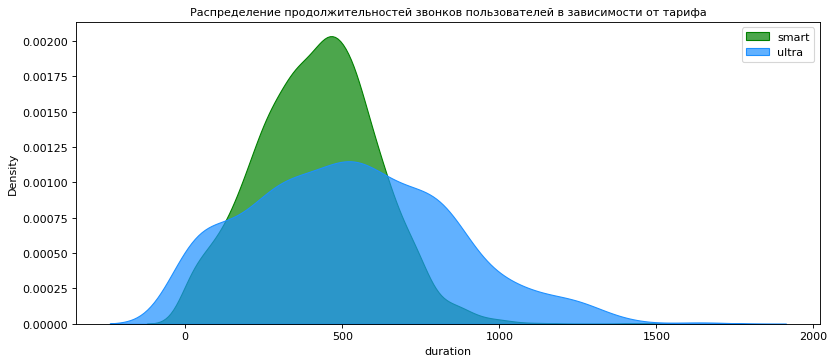

In [50]:
# строим гистограмму по распределению продолжительности звонков в месяц для пользователей разных тарифов
plt.figure(figsize=(12, 5), dpi= 80)
sns.kdeplot(smart['duration'], shade=True, color="g", label="smart", alpha=.7)
sns.kdeplot(ultra['duration'], shade=True, color="dodgerblue", label="ultra", alpha=.7)
plt.title('Распределение продолжительностей звонков пользователей в зависимости от тарифа', fontsize=10)
plt.legend()
plt.show()

Согласно документации в тариф "Смарт" входит 500 минут, а в тариф "Ультра" - 3000 минут разговора. 

По средним и медианным значениям количества потраченных минут видно, что пользователи обоих тарифов в среднем укладываются в обозначенные ограничения тарифа. 

У пользователей тарифа "Ультра" больший разброс данных и больше дисперсия соответственно. Они обычно не платят за дополнительные минуты, им достаточно тех, что входят в тариф. Более того этих минут так много, что большинство пользователей их не расходует полностью. 

В среднем, конечно, пользователи тарифа "Смарт" укладываются в ограничения тарифа. Однако судя по диаграмме достаточно много пользователей в выборке, которые доплачивали за дополнительные минуты разговора, т.е. тратили средства сверх тарифа. 

Рассмотрим данные по отправке сообщений пользователями разных тарифов:

In [51]:
# группируем данные по количеству сообщений в зависимости от тарифа, сохраняем описание этих данных 
# в переменную data_tariffs_mess_count
data_tariffs_mess_count = data.groupby('tariff')['mess_count'].describe()
# создаем столбец var и добавляем в него данные о дисперсии по каждому из тарифов
data_tariffs_mess_count['var'] = [np.var(smart['mess_count']), np.var(ultra['mess_count'])]
# выводим  таблицу на экран
data_tariffs_mess_count

,count,mean,std,min,25%,50%,75%,max,var
tariff,,,,,,,,,
smart,2229.0,33.384029,28.227876,0.0,10.0,28.0,51.0,143.0,796.455483
ultra,985.0,49.363452,47.804457,0.0,6.0,38.0,79.0,224.0,2282.946075


Построим диаграмму распределения количества сообщений отправленных за месяц пользователями каждого из тарифов:

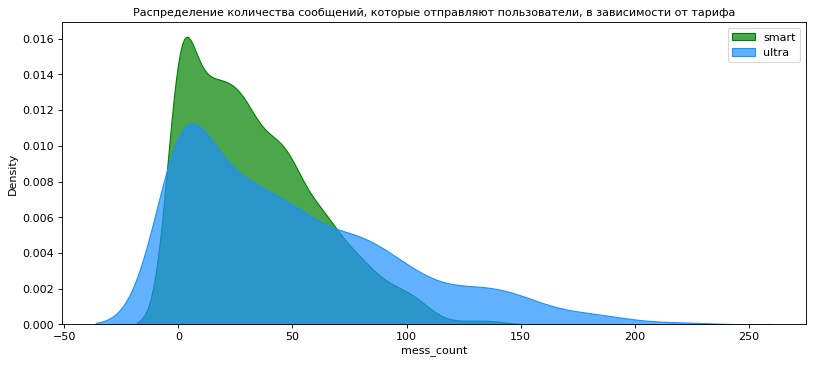

In [52]:
# строим гистограмму по распределению количества отправленных сообщений в месяц для пользователей разных тарифов
plt.figure(figsize=(12, 5), dpi= 80)
sns.kdeplot(smart['mess_count'], shade=True, color="g", label="smart", alpha=.7)
sns.kdeplot(ultra['mess_count'], shade=True, color="dodgerblue", label="ultra", alpha=.7)
plt.title('Распределение количества сообщений, которые отправляют пользователи, в зависимости от тарифа', fontsize=10)
plt.legend()
plt.show()

Согласно документации в тариф "Смарт" входит 50 сообщений в месяц, в тариф "Ультра" - 1000 сообщений в месяц. 

Тут видим в целом такую же ситуацию, как с потраченными в месяц минутами:
- у пользователей тарифа "Ультра" больший разброс данных, дисперсия. Однако они не выходят за рамки пакета услуг предоставляемых по тарифу
- пользователи тарифа "Смарт" в среднем тоже укладываются в пакет сообщений, который доступен им в рамках тарифа. Однако есть достаточное количество пользователей, которые как мы видим из диаграммы, переплачивают за дополнительные сообщения

Теперь посмотрим на данные по использованным гигабайтам интернета в месяц по каждому из тарифов:

In [53]:
# группируем данные по тарифу исходя из потраченных гигов в месяц, сохраняем описание этих данных в data_tariffs_gb_used
data_tariffs_gb_used = data.groupby('tariff')['gb_used'].describe()
# создаем столбец var и добавляем в него данные о дисперсии по каждому из тарифов
data_tariffs_gb_used['var'] = [np.var(smart['gb_used']), np.var(ultra['gb_used'])]
# выводим таблицу на экран
data_tariffs_gb_used

,count,mean,std,min,25%,50%,75%,max,var
tariff,,,,,,,,,
smart,2229.0,16.328847,5.747061,0.0,13.0,17.0,20.0,38.0,33.013887
ultra,985.0,19.494416,9.853511,0.0,12.0,19.0,27.0,49.0,96.993116


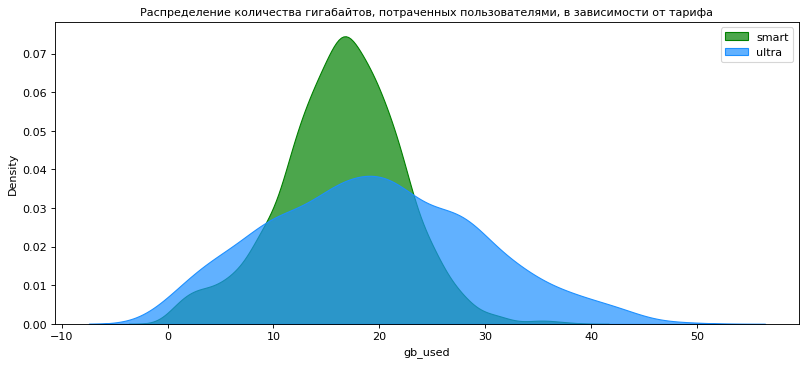

In [54]:
# строим гистограмму по распределению количества потраченных гигабайт в месяц для пользователей разных тарифов
plt.figure(figsize=(12, 5), dpi= 80)
sns.kdeplot(smart['gb_used'], shade=True, color="g", label="smart", alpha=.7)
sns.kdeplot(ultra['gb_used'], shade=True, color="dodgerblue", label="ultra", alpha=.7)
plt.title('Распределение количества гигабайтов, потраченных пользователями, в зависимости от тарифа', fontsize=10)
plt.legend()
plt.show()

Согласно документации в тариф "Смарт" входит 15 ГБ трафика, в тариф "Ультра" - 30 ГБ трафика. 

Исходя из диаграммы видно, что пользователи обоих тарифов частенько доплачивают за дополнительный трафик. Однако пользователи тарифа "Смарт" в среднем используют больше, чем есть в пакете услуг тарифа и соответственно доплачивают гораздо чаще, чем пользователи тарифа "Ультра".

### Вывод

Пользователи разных тарифов ведут себя по-разному. 

Пользователи тарифа "Смарт" в среднем укладываются в количество минут и сообщений, предоставленных им в рамках тарифного плана. Однако достаточно большая часть пользователей переплачивает за дополнительные минуты или сообщения сверх плана. 

Пользователи тарифа "Ультра" имеют больший разброс данных об использовании минут, сообщений и гигабайт. Однако за минуты и сообщения они не переплачивают. Более того большинство пользователей не использует все минуты и сообщения, которые им были предоставлены в рамках тарифа. 

В плане использования гигабайт интернета пользователи обоих тарифов частенько доплачивают за дополнительный трафик. Однако пользователи тарифа "Смарт" делают этого гораздо-гораздо чаще. 

## Проверка гипотезы

Итак, попробуем проверить гипотезы:

Пусть гипотеза: НО - средняя выручка пользователей тарифов "Смарт" и "Ультра" равны

Альтернативная ей: Н1 - средние значения выручка пользователей тарифов "Смарт" и "Ультра" не равны

Возьмем критический уровень статистической значимости не более 5%.

In [55]:
# т-тест для проверки гипотезы о том, что выручка для пользователей тарифов "Смарт" и "Ультра" равна
sample_1 = smart['income']
sample_2 = ultra['income']
results = st.ttest_ind(sample_1, sample_2)
alpha = 0.05

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  1.4229814360764067e-160
Отвергаем нулевую гипотезу


Проверка показала, что выручка по пользователям тарифов "Смарт" и "Ультра" не равна. Проверим за пользователей какого тарифа выручка за год и в среднем за месяц получилась больше:

In [56]:
# создаем сводную таблицу по тарифам, суммируем общую выручку и вычисляем среднюю вырочку за месяц
income_tariff = data.pivot_table(index='tariff', values='income', aggfunc=['sum', 'mean'])
income_tariff

,sum,mean
,income,income
tariff,,
smart,2875351,1289.973531
ultra,2039100,2070.152284


В среднем за месяц за пользователей тарифа "Смарт" выручка получается меньше. Однако если смотреть данные за весь год, то благодаря использованию дополнительных минут, сообщений и гигабайт пользователи тарифа "Смарт" принесли больше выручки, чем пользователи тарифа "Ультра"

Проверим информацию по городам:

Пусть: HO - средняя выручка пользователей из Москвы такая же, как выручка с пользователей других регионов. 

Альтернативная гипотеза: Н1 - средняя выручка пользователей из Москвы отличается от пользователей из других регионов

In [57]:
# т-тест для проверки гипотезы о том, что выручка для пользователей из Москвы и других регионов равна
sample_1 = data[data['city'] == 'Москва']['income']
sample_2 = data[data['city'] != 'Москва']['income']
results = st.ttest_ind(sample_1, sample_2)
alpha = 0.05

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Опровергнуть нулевую гипотезу нельзя')

p-значение:  0.5440152911670224
Опровергнуть нулевую гипотезу нельзя


Значит выручка для пользователей из столицы и регионов примерно равна. Проверим это. Рассчитаем общую выручку за год и среднюю за месяц:

In [58]:
# создаем столбец с категорией города, добавляем значение "Другие"
data['city_category'] = 'Другой'
# в столбце меняем значение тех строк, которые не соответствуют условию "не Москва", то есть являются Москвой
data['city_category'] = data['city_category'].where(data['city']!='Москва', 'Москва')
# делаем сводную таблицу по Москве и другим городам, рассчитываем суммарную выручку за год и среднюю выручку в месяц
data.pivot_table(index='city_category', values='income', aggfunc=['sum', 'mean'])

,sum,mean
,income,income
city_category,,
Другой,3969409,1524.936227
Москва,945042,1546.713584


Суммарно выручка по пользователям из других городов получилась больше, но в среднем за месяц выручка по пользователям из Москвы и других городов почти одинакова.

## Общий вывод

Для проведения исследования мы привели данные к нужным типам: скорректировали даты, удалили лишний столбец, которого не было в документации, выделили месяц в отдельный столбец. 
Далее мы группировали данные по количеству и длительности звонков, количеству сообщений и потраченных гигабайт для каждого из пользователей по месяцам. Затем свели все данные в одну таблицу. При группировке были обнаружены два пользователя, об использовании услуг по тарифам, у которых у нас не было данных. Мы вынуждены были удалить 2 строки сводной таблицы. 
По каждому пользователю в месяц мы рассчитали выручку исходя из стоимости тарифа + дополнительных услуг сверх тарифа. 


После обработки данных мы выявили особенности пользователей разных тарифов:
- пользователи тарифа "Смарт" в среднем укладываются в лимиты по количеству минут и сообщений, но чаще чем пользователи тарифа "Ультра" покупают дополнительные услуги. При использовании интернета они в среднем тратят больше, чем заложено в их тарифном плане, и даже больше, чем пользователи тарифа "Ультра"
- пользователи тарифа "Ультра" весьма распределены по тому сколько они тратят минут и сообщений. Однако они всегда укладываются в тариф. Превышение у них есть только по использованию интернета. Они могут доплачивать за дополнительные гигабайты сверх лимита в их тарифе

Мы отвергли гипотезу о том, что пользователи тарифов "Смарт" и "Ультра" имеют одинаковую выручку. 


***Наиболее выгоден с точки зрения получения максимальной выручки тариф "Смарт", так как его пользователи тратят больше, часто используя дополнительные минуты, сообщения и гигабайты***


Мы не смогли отвергнуть гипотезу о том, что пользователи из Москвы и регионов имеют одинаковую выручку. При расчетах вышло, что суммарная выручка за год по регионам больше, чем в столице. Однако в среднем за месяц пользователи тратят примерно одинаково.